## CAPSTONE PROJECT - PROJECTING NBA SUCCESS FROM PLAYER BIOMETRICS

In [12]:
#data import and cleaning
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import csv
df = pd.read_csv ("https://raw.githubusercontent.com/ohiostate82/Stats-Models/master/NBA_clean.csv")

In [13]:
# split out by position 
Guards = df.loc[df['Position'].isin(['PG','SG'])]
Forwards = df.loc[df['Position'].isin(['SF','PF'])]
Centers = df.loc[df['Position'].isin(['C'])]

In [16]:
#X and y variables for model

# ALL PLAYERS
X_OV = df.drop(['Player','Still_in_league','Position','College'],axis=1)
y_OV = df['Still_in_league'].values

# GUARDS
X_Guards = Guards.drop(['Player','Still_in_league','Position','College'],axis=1)
y_Guards = Guards['Still_in_league'].values

# FORWARDS
X_Forwards = Forwards.drop(['Player','Still_in_league','Position','College'],axis=1)
y_Forwards = Forwards['Still_in_league'].values

# CENTERS
X_Centers = Centers.drop(['Player','Still_in_league','Position','College'],axis=1)
y_Centers = Centers['Still_in_league'].values

In [17]:
# scale data
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()

#scale X to make the mean 0 and unit standard deviation

# AlL PLAYERS
scl_obj.fit(X_OV) 
X_scaled_OV = scl_obj.transform(X_OV)

# GUARDS
scl_obj.fit(X_Guards) 
X_scaled_Guards = scl_obj.transform(X_Guards)

# FORWARDS
scl_obj.fit(X_Forwards) 
X_scaled_Forwards = scl_obj.transform(X_Forwards)

# CENTERS
scl_obj.fit(X_Centers) 
X_scaled_Centers = scl_obj.transform(X_Centers)


## Test Linear Regression Model 
## TESTING CONFIRMED THAT WE NEED MORE DATA TO PERFORM THIS TYPE OF ANALYSIS - PARTICULARY COLLEGE STATS AND QUALITY OF COLLEGE. WE WON'T RUN UNLESS WE DECIDE TO PURSUE LATER ON

In [332]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# test/training data
X_train_LR_OV,X_test_LR_OV,y_train_LR_OV,y_test_LR_OV = train_test_split(X_scaled_OV,y_OV,test_size=0.2, random_state = 42)


# Note the difference in argument order
model = sm.OLS(y_train_LR_OV, X_train_LR_OV).fit()
predictions = model.predict(X_test_LR_OV) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.970
Date:                Tue, 13 Mar 2018   Prob (F-statistic):             0.0308
Time:                        09:45:33   Log-Likelihood:                -166.44
No. Observations:                 160   AIC:                             356.9
Df Residuals:                     148   BIC:                             393.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0193      0.063      0.305      0.761        -0.106     0.144
x2            -0.2672      0.061     -4.356      0.000        -0.388    -0.146
x3            -0.3111      0.680     -0.458      0.648        -1.655     1.033
x4             0.4323      0.696      0.621      0.535        -0.943     1.807
x5             0.0105      0.171      0.062      0.951        -0.327     0.348
x6            -0.0111      0.081     -0.136      0.892        -0.172     0.150
x7            -0.0313      0.088     -0.354      0.724        -0.206     0.143
x8            -0.0408      0.071     -0.575      0.566        -0.181     0.099
x9            -0.0126      0.073     -0.174      0.862        -0.156     0.131
x10           -0.0201      0.091     -0.220      0.826        -0.201     0.160
x11           -0.0952      0.120     -0.797      0.427        -0.331     0.141
x12            0.0172      0.077      0.222      0.825        -0.136     0.170
x13            0.0021      0.088      0.024      0.981        -0.172     0.176
x14           -0.0047      0.071     -0.066      0.947        -0.145     0.135
==============================================================================
Omnibus:                        7.838   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                3.652
Skew:                          -0.048   Prob(JB):                        0.161
Kurtosis:                       2.266   Cond. No.                     1.05e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.99e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###  Logistic Regression - All Players Only Biometric Stats

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

#create a train/test split of 80%/20%
# assign static random seed =42
X_train_OV,X_test_OV,y_train_OV,y_test_OV = train_test_split(X_scaled_OV,y_OV,test_size=0.2, random_state = 42)


# Parameter grid search for C variable
log_scorer = make_scorer(f1_score, pos_label = 1)
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 2,10,1000] }
logreg = LogisticRegression(random_state = 0, class_weight = 'balanced')
logclf = GridSearchCV(logreg, log_param_grid, scoring = log_scorer, cv = 10)

#fit model
logclf.fit(X_train_OV,y_train_OV)

#Predict using Test data and get training data predictions
log_grid_model = logclf.best_estimator_
log_grid_model.fit(X_train_OV, y_train_OV)
log_test = log_grid_model.predict(X_test_OV)

In [24]:
# Print best paramter of C and score
print(logclf.best_score_)
print(logclf.best_params_)

0.718952850877193
{'C': 0.1}


In [28]:
# sort and print out model coefficients
zip_vars = zip(log_grid_model.coef_.T, X_OV) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

Draft_pick has weight of -0.9734973369811513
Age_first_yr has weight of -0.18495182870194057
agility has weight of -0.16408359835065842
Body_fat has weight of -0.14467433532217958
Weight has weight of -0.06847604023854148
Hand_width has weight of -0.045457489974989544
Vert_max has weight of -0.026302705285078783
Hand_length has weight of -0.02547689171629107
Vert_nostep has weight of -0.01963009630929545
Vert_maxreach has weight of -3.226666211772613e-05
Vert_nostep_reach has weight of 0.00766428087104909
Wingspan has weight of 0.019216692811131742
Standing_reach has weight of 0.019349381464686885
Hght_noshoes has weight of 0.07614274757855076
Hght_wtshoes has weight of 0.0830518420263784
sprint has weight of 0.16829505281627397


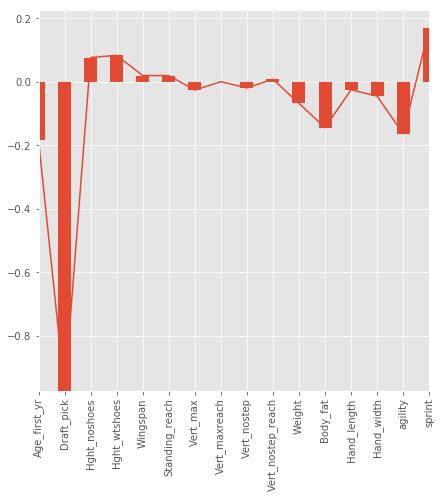

In [32]:
#Plot the coefficients
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(log_grid_model.coef_[0],index=X_OV.columns)
weights.plot(kind='bar')
weights.plot(figsize=(7,7))
plt.xticks(rotation=90)
plt.show()

In [33]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_OV,logreg_test_OV))

             precision    recall  f1-score   support

          0       0.50      0.75      0.60        12
          1       0.87      0.69      0.77        29

avg / total       0.76      0.71      0.72        41



In [34]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_OV, logreg_test_OV))

0.7198275862068966


Confusion matrix
[[ 9  3]
 [ 9 20]]


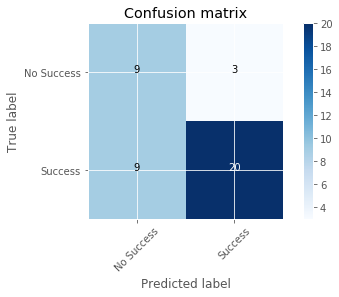

In [36]:
# Confusion matrix
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
from sklearn import metrics as mt
import matplotlib.pyplot as plt


log_conf = mt.confusion_matrix(y_test_OV,logreg_test_OV)

class_names = ['No Success', 'Success']
plot_confusion_matrix(log_conf, classes=class_names)

plt.show()

 Below is the total cost score from the Logistic Regression model. <br> **Cost Score = (9)(-1) + (3)(10) + (9)(15) + (20)(-1) = 136**

###  Logistic Regression - All Players w/ College Stats

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

#create a train/test split of 80%/20%
# assign static random seed =42
X_train_OV,X_test_OV,y_train_OV,y_test_OV = train_test_split(X_scaled_OV,y_OV,test_size=0.2, random_state = 42)


# Parameter grid search for C variable
log_scorer = make_scorer(f1_score, pos_label = 1)
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 2,10,1000] }
logreg = LogisticRegression(random_state = 0, class_weight = 'balanced')
logclf = GridSearchCV(logreg, log_param_grid, scoring = log_scorer, cv = 10)

#fit model
logclf.fit(X_train_OV,y_train_OV)

#Predict using Test data and get training data predictions
log_grid_model = logclf.best_estimator_
log_grid_model.fit(X_train_OV, y_train_OV)
log_test = log_grid_model.predict(X_test_OV)

In [19]:
# Print best paramter of C and score
print(logclf.best_score_)
print(logclf.best_params_)

0.748102894808178
{'C': 2}


In [20]:
# sort and print out model coefficients
zip_vars = zip(log_grid_model.coef_.T, X_OV) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

Draft_pick has weight of -1.6544581016970923
ast has weight of -0.5572311493886805
Vert_nostep has weight of -0.4756463605085011
Age_first_yr has weight of -0.44981896962151324
Hght_noshoes has weight of -0.2800217730657808
Body_fat has weight of -0.24370038735409527
Vert_nostep_reach has weight of -0.23599813633283195
ft_pct has weight of -0.17538590232686582
Wingspan has weight of -0.1405326370534764
Hand_length has weight of -0.08417259459465042
Weight has weight of -0.04893288775713707
Vert_max has weight of -0.0014418067725880139
games has weight of 9.805986206558271e-05
fnl_coll_rpi has weight of 0.019778911937565348
Hand_width has weight of 0.02712487128679683
Hght_wtshoes has weight of 0.038330873016301927
Standing_reach has weight of 0.07293191736301906
Vert_maxreach has weight of 0.08539955078079042
pts_ppg has weight of 0.24920029752771844
fg2_pct has weight of 0.37434159225236063
fg3_pct has weight of 0.5088874872358906
Tms_played_for has weight of 0.8606567991301468
trb ha

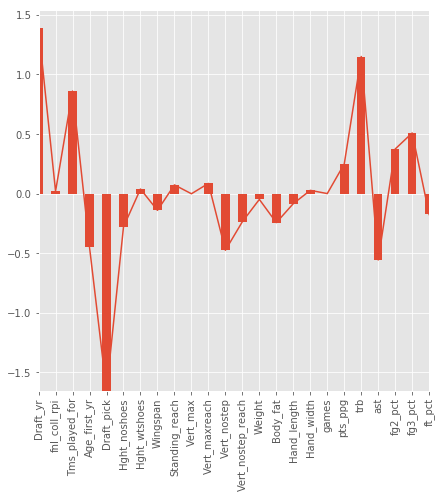

In [21]:
#Plot the coefficients
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(log_grid_model.coef_[0],index=X_OV.columns)
weights.plot(kind='bar')
weights.plot(figsize=(7,7))
plt.xticks(rotation=90)
plt.show()

In [23]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_OV,log_test))

             precision    recall  f1-score   support

          0       0.58      0.73      0.65        15
          1       0.80      0.67      0.73        24

avg / total       0.71      0.69      0.70        39



### Random Forest - All Players

In [346]:
# Initiate Grid Search from scoring function and parameter grid 
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
rf_scorer = make_scorer(f1_score, pos_label = 1)

rf_param_grid = param_grid = { 
    'n_estimators': [10,20, 50, 100, 150, 200, 250],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5,8,10,12],
    'criterion' :['gini', 'entropy']}

# Import RFC
# Implement GridSearch and Train Model
from sklearn.ensemble import RandomForestClassifier
rf_OV = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced')

rfclf_OV = GridSearchCV(rf_OV, rf_param_grid, scoring = rf_scorer, cv = 10)
rfclf_OV.fit(X_train_OV, y_train_OV)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100, 150, 200, 250], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 8, 10, 12], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, pos_label=1), verbose=0)

In [347]:
# Assign the best estimator and Train again
# Predict in rf_test_OV step
rf_grid_OV = rfclf_OV.best_estimator_
rf_grid_OV.fit(X_train_OV, y_train_OV)
rf_test_OV = rf_grid_OV.predict(X_test_OV)

# Show Best Parameter/Score
print(rfclf_OV.best_score_)
print(rfclf_OV.best_params_)

0.7451441563467492
{'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 20}


In [349]:
# Confusion matrix
rf_conf_OV = mt.confusion_matrix(y_test_OV,rf_test_OV)
print(rf_conf_OV)

[[ 8  4]
 [12 17]]


In [350]:
# Classification report
print(classification_report(y_test_OV,rf_test_OV))

             precision    recall  f1-score   support

          0       0.40      0.67      0.50        12
          1       0.81      0.59      0.68        29

avg / total       0.69      0.61      0.63        41



In [351]:
# ROC score
print(roc_auc_score(y_test_OV, rf_test_OV))

0.6264367816091956


In [352]:
# Sort coefficients by weight and print
zip_vars = zip(rf_grid_OV.feature_importances_.T, X_OV)
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef)

Age_first_yr has weight of 0.032927028626873446
Hand_length has weight of 0.03532272048735874
Vert_max has weight of 0.036198314126604375
Vert_nostep_reach has weight of 0.037430840476721995
Vert_nostep has weight of 0.03834127185586604
Standing_reach has weight of 0.04665236265223438
Vert_maxreach has weight of 0.050164253779457546
Hght_wtshoes has weight of 0.05049004144123294
Body_fat has weight of 0.053068010196141116
Hand_width has weight of 0.05814945608363729
Hght_noshoes has weight of 0.06429647391459778
Weight has weight of 0.06755366272707905
Wingspan has weight of 0.0721632219044753
Draft_pick has weight of 0.35724234172772007


### GUARDS

In [367]:
#create a train/test split of 80%/20%
# assign static random seed =42
X_train_Guards,X_test_Guards,y_train_Guards,y_test_Guards=train_test_split(X_scaled_Guards,y_Guards,
test_size=0.2, random_state = 42)

#fit model
logreg_Guards = logreg.fit(X_train_Guards,y_train_Guards)

#Predict on test data set
logreg_Guards.predict(X_test_Guards)

#Print Score
logreg_Guards.score(X_test_Guards, y_test_Guards)

0.5263157894736842

### FORWARDS

In [368]:
#create a train/test split of 80%/20%
# assign static random seed =42
X_train_Forwards,X_test_Forwards,y_train_Forwards,y_test_Forwards = train_test_split(X_scaled_Forwards,y_Forwards,
test_size=0.2, random_state = 42)

#fit model
logreg_Forwards = logreg.fit(X_train_Forwards,y_train_Forwards)

#Predict on test data set
logreg_Forwards.predict(X_test_Forwards)

# Print score
logreg_Forwards.score(X_test_Forwards, y_test_Forwards)

0.4375

### CENTERS

In [369]:
#create a train/test split of 80%/20%
# assign static random seed =42
X_train_Centers,X_test_Centers,y_train_Centers,y_test_Centers = train_test_split(X_scaled_Centers,y_Centers,
test_size=0.2, random_state = 42)

#fit model
logreg_Centers = logreg.fit(X_train_Centers,y_train_Centers)

#Predict on test data set
logreg_Centers.predict(X_test_Centers)

# Print score
logreg_Centers.score(X_test_Centers, y_test_Centers)

0.5714285714285714